<a href="https://colab.research.google.com/github/bob8dod/ML-studying/blob/main/ML_DL/18_DL_Model_(RNN_LSTM%2CEmbedding).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import reuters #load reuters data
from tensorflow.keras.preprocessing.sequence import pad_sequences #for text padding
from tensorflow.keras.utils import to_categorical # for One-Hot encoding(Y)
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Embedding, LSTM, Dense # RNN : Embedding, LSTM / NN: Dense

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
seed = 3
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
(X_train,Y_train),(X_test, Y_test) = reuters.load_data(num_words=1000, test_split=0.2) #Data load, split
print('Train :', X_train.shape[0])
print('Test :' ,X_test.shape[0])
print('Class :', np.max(Y_train)+1)
print(X_train[0])

Train : 8982
Test : 2246
Class : 46
[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 2, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 2, 2, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 2, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [ ]:
#Data preprocessing
X_train = pad_sequences(X_train, maxlen=100) # make 1doc to have max word length 100
X_test = pad_sequences(X_test, maxlen=100)
Y_train = to_categorical(Y_train,46) #One-Hot Encoding
Y_test = to_categorical(Y_test,46)

In [ ]:
#Model Setting
model = Sequential()
model.add(Embedding(1000, 100)) #Embedding(number of words, Number of words to receive in one input)
model.add(LSTM(100, activation='tanh')) #LSTM(Number of words to receive in one input, )
model.add(Dense(46, activation = 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
#Model operating
history = model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=20, batch_size=100)
print('\nAccuracy: %.4f' %(model.evaluate(X_test,Y_test)[1]))

Epoch 1/20
90/90 [==============================] - 3s 18ms/step - loss: 2.9665 - accuracy: 0.3179 - val_loss: 2.1698 - val_accuracy: 0.4488
Epoch 2/20
90/90 [==============================] - 1s 13ms/step - loss: 2.0566 - accuracy: 0.4786 - val_loss: 1.9583 - val_accuracy: 0.5076
Epoch 3/20
90/90 [==============================] - 1s 13ms/step - loss: 1.9031 - accuracy: 0.5122 - val_loss: 2.2469 - val_accuracy: 0.3758
Epoch 4/20
90/90 [==============================] - 1s 13ms/step - loss: 1.8821 - accuracy: 0.4954 - val_loss: 1.7424 - val_accuracy: 0.5530
Epoch 5/20
90/90 [==============================] - 1s 13ms/step - loss: 1.7428 - accuracy: 0.5492 - val_loss: 1.7325 - val_accuracy: 0.5637
Epoch 6/20
90/90 [==============================] - 1s 13ms/step - loss: 1.6558 - accuracy: 0.5855 - val_loss: 1.6638 - val_accuracy: 0.5904
Epoch 7/20
90/90 [==============================] - 1s 13ms/step - loss: 1.6041 - accuracy: 0.5941 - val_loss: 1.6303 - val_accuracy: 0.6189
Epoch 8/20
90

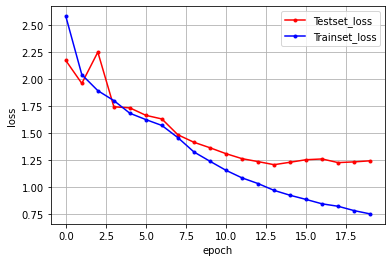

In [ ]:
#preparing Graph
y_vloss = history.history['val_loss']
y_loss = history.history['loss']
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c="red", label = 'Testset_loss')
plt.plot(x_len, y_loss, marker='.', c="blue", label = 'Trainset_loss')
plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()